# Multi-Arm Bandits

Suppose your at favorite casino a are $k$-different slot machines. Each machine has ouput a reward according to an unknown distribution. In multi-arm bandit problem, an agent(or a player) has $k$ different actions with an associated expected reward value. Suppose $A_t=a$ denotes the action taken time $t$ and a associated reward $R_t$. The value of action $a$ is denoted by:
$$q(a) = \mathbb{E}[R_t|A_t=a] $$
Since the distribution is unknown to the agent, the estimate of $q(a)$ required which will be denoted by $Q(a)$.

### Goal
The goal of any gambler is to minimize regret, and similarly an agent faced with a multi-arm bandit problem wants to minimize regret. Regret $\rho$ after $T$ rounds is definited as follows:

$$\rho=Tq^{\star}-\sum_{t=1}^T R_t $$

where $q^{\star} = \max_a q(a)$. The regret metric accounts for the disparity between the maximal expected reward over all $q(a)$ and the accumulated rewards.

### Approach 

A plausible approach could be a greed approach, in which given the current estimates of $Q(a)$, the action is decided via the following policy:

$$A_t=\text{argmax}_aQ(a)$$

Such a strategy does not allow for exploration of different actions and also, the agent becomes on initial conditions. Instead we allow the agent to make a random selection among the $k$ different actions with a probablility $\varepsilon$. Such algorithms are dubbed $\varepsilon$-greedy algorithms

### Estimating $Q(a)$

The initial estimate of $Q(a)$ can be initialized to encode prior beliefs, to zero, or even to random values. Since $Q(a)$ is an estimate of $q(a)$, it makes sense that the sample mean of the rewards be a sufficient estimator of $q(a)$. An efficiet streaming algorithm for estimating the sample mean is given by:

$$N(A) \gets N(a)+1 $$

$$Q(A) \gets Q(a) + \frac{1}{N(a)} (R-Q(a)) $$

where $N(A)$ is number of occurences of action A



In [12]:
import numpy as np

%matplotlib inline

class EpsilonGreedy_Strategy(object):
    def __init__(self,k,eps):
        self.k=k
        self.Q=np.zeros(k)
        self.N=np.zeros(k)
        self.eps=eps
        
    def update(self,R,a):
        self.N[a]+=1
        self.Q[a]=self.Q[a]+(1./self.N[a])*(R-self.Q[a])
    
    def choose_action(self):
        if np.random.rand()<1-self.eps:
            return self.Q.argmax()
        else:
            return np.random.randint(0,k)

        
if __name__=="__main__":
    import matplotlib.pyplot as plt
    
    k=10
    R=(np.array(range(k)))/float(k)
    
    def bandit_k(a,R):
        return np.random.randn()+R[a]
    
    
    
    player=EpsilonGreedy_Strategy(k,1e-3)
    T=int(1e6)
    A_player=np.zeros(T)
    R_player=np.zeros(T)
    
    for i in xrange(0,T):
        
        A=player.choose_action()
        A_player[i]=A
        R_out=bandit_k(A,R)
        R_player[i]=R_out
        player.update(R_out,A)

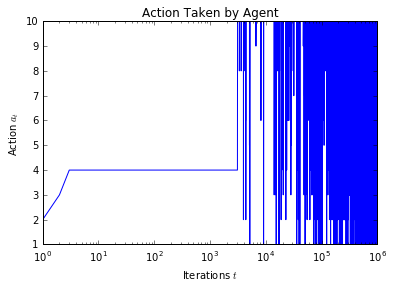

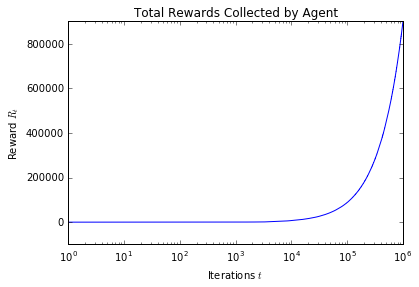

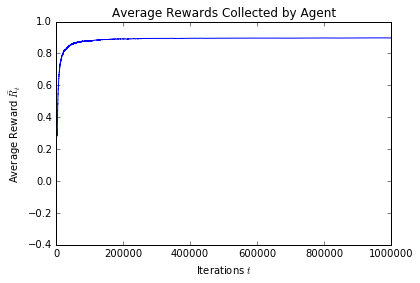

Player Reward Estimates:
[-0.05020386728790957, 0.1288259082955278, 0.2725558812579154, 0.29182396614347683, 0.40277839376194324, 0.5549835493082595, 0.6108036347540318, 0.7429497385925488, 0.6740762857371444, 0.9001048941316521]
True underlying rewards:
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [15]:
    
    
    plt.semilogx(A_player+1)
    plt.xlabel(r'Iterations $t$')
    plt.ylabel(r'Action $a_t$')
    plt.title('Action Taken by Agent')
    plt.yticks(range(1,11),range(1,11))
    plt.show()
    
    plt.figure()
    tot_R=R_player.cumsum()
    plt.semilogx(tot_R)
    plt.xlabel(r'Iterations $t$')
    plt.ylabel(r'Reward $R_t$')
    plt.title('Total Rewards Collected by Agent')
    plt.show()
    
    
    avg_R=tot_R/(np.arange(1,T+1)*1.)
    plt.figure()
    plt.plot(avg_R)
    plt.xlabel(r'Iterations $t$')
    plt.ylabel(r'Average Reward $\bar{R}_t$')
    plt.title('Average Rewards Collected by Agent')
    plt.show()
    
    
    
    print "Player Reward Estimates:\n" + str(player.Q.tolist())
    print "True underlying rewards:\n"+str(R.tolist())

### References:

1. Sutton, Richard S., and Andrew G. Barto. Reinforcement learning: An introduction Second Edition
2. 